In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Loading cleaned browser history
df = pd.read_csv("history_cleaned.csv")

df.head()


,Time,domain
0,2026-01-09 07:36:52,onedrive.live.com
1,2026-01-09 07:36:51,onedrive.live.com
2,2026-01-09 07:36:48,onedrive.live.com
3,2026-01-09 07:36:47,1drv.ms
4,2026-01-09 07:36:47,onedrive.live.com


In [2]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    1189 non-null   object
 1   domain  1189 non-null   object
dtypes: object(2)
memory usage: 18.7+ KB


,Time,domain
count,1189,1189
unique,886,230
top,2025-11-30 14:44:01,www.google.com
freq,7,426


In [6]:

df = df.copy()

df.loc[:, "datetime"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["datetime"])

df.loc[:, "hour"] = df["datetime"].dt.hour
df.loc[:, "day"] = df["datetime"].dt.day_name()
df.loc[:, "date"] = df["datetime"].dt.date

df.head()




,Time,domain,datetime,hour,day,date
0,2026-01-09 07:36:52,onedrive.live.com,2026-01-09 07:36:52,7,Friday,2026-01-09
1,2026-01-09 07:36:51,onedrive.live.com,2026-01-09 07:36:51,7,Friday,2026-01-09
2,2026-01-09 07:36:48,onedrive.live.com,2026-01-09 07:36:48,7,Friday,2026-01-09
3,2026-01-09 07:36:47,1drv.ms,2026-01-09 07:36:47,7,Friday,2026-01-09
4,2026-01-09 07:36:47,onedrive.live.com,2026-01-09 07:36:47,7,Friday,2026-01-09



Ouestion 1
The most visited sites 


In [7]:
top10_domains = df["domain"].value_counts().head(10)
top10_domains


domain
www.google.com                  426
www.googleadservices.com         46
blackboard.umbc.edu              36
api-4f567d87.duosecurity.com     35
webauth.umbc.edu                 31
ad.doubleclick.net               28
www.cinemark.com                 26
www.nike.com                     26
teams.live.com                   23
www.ebay.com                     17
Name: count, dtype: int64

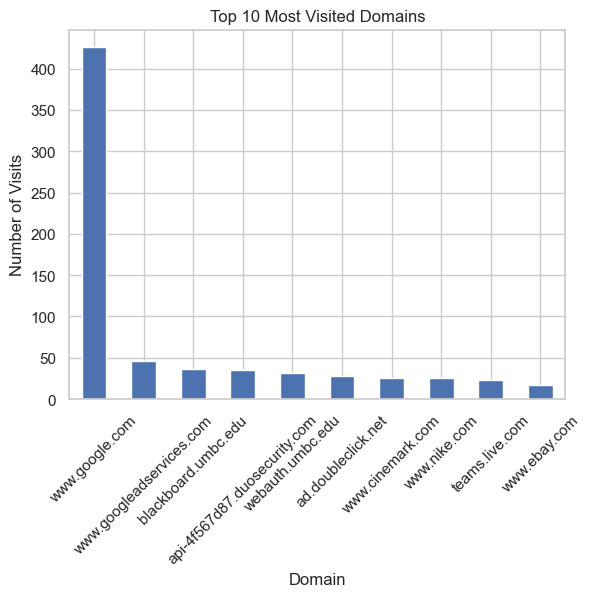

In [8]:
top10_domains.plot(kind="bar")
plt.title("Top 10 Most Visited Domains")
plt.xlabel("Domain")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.show()


ANALYSIS 

As we can see in the bar grah google.com is by far the most visted site then any other site this shows that the user higly depends on google search for searching information or accesing anyother website.


Several worke related and education related domains are also seen second to our top searched site educational and worked realetd sites like umbc.edu and blackbord.umbc.edu all of this clearly indicate that the user is a student 

we can also see some other domains visted such as nike.com showing some personal intrest and www.cinemark.com which is used to book movie tickets. The browsing shows a pattern of academic and personal browsing which cleraly indicated the user to be a student


QUESTION 2 What time of the day is the user most active ?

In [12]:
hourly_activity = df["hour"].value_counts().sort_index()
hourly_activity


hour
0     148
2      13
3       7
5      11
6       3
7      46
8      15
9      36
10     31
11     35
12     55
13     73
14     80
15     60
16     84
17     90
18     44
19     65
20    105
21     46
22     81
23     56
Name: count, dtype: int64

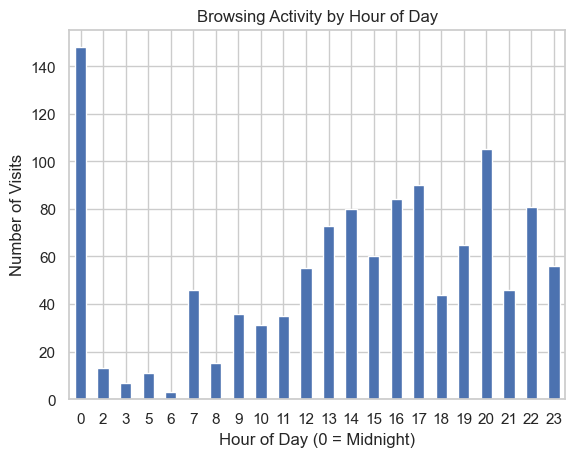

In [13]:
hourly_activity.plot(kind="bar")
plt.title("Browsing Activity by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight)")
plt.ylabel("Number of Visits")
plt.xticks(rotation=0)
plt.show()


ANALYSIS

As the bar grap indicated that the user is more active at mindnight at 12am showing high use of internet at that time we can also see that the activity remains constant in the afternoon to the evening timw from 1pm to 9pm
whivh may corrospond to academic or work related activity in this time.the browsing activit is lowest during the moring hours 2am to 6am showing minimal intrest during the sleeping hours 

QUESTION 3 which days of the weeks is the most active or browses the most?


In [14]:
daily_activity= df["day"].value_counts()
daily_activity


day
Thursday     237
Tuesday      192
Monday       185
Sunday       153
Wednesday    150
Friday       134
Saturday     133
Name: count, dtype: int64

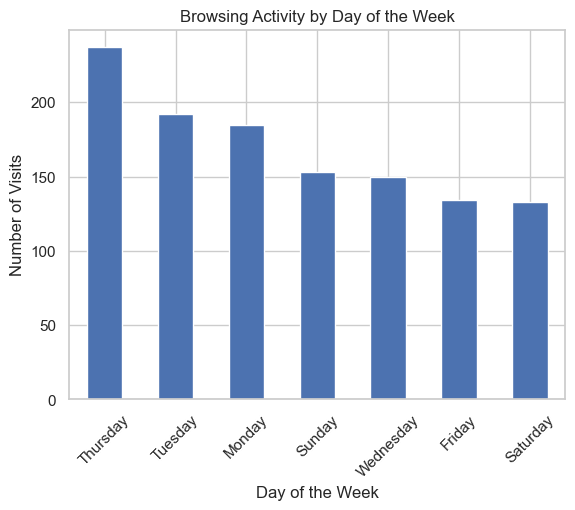

In [15]:
daily_activity.plot(kind="bar")
plt.title("Browsing Activity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.show()


ANALYSIS

Browsing activit is the higest on Thursday followed by tuesday and monday the bar showes an elavation on this days showing that the user is more active on the coredays of the week.wednesday and sundays sow moderate usage outside the peek wordays and friday and saturday show the lowest browsing activity indicating the decrese in the browsing activity by the weekend. overall these activity is mostly driven by academic or work related activites

QUESTION 4 Is the user more active during thw working hours or not?

In [16]:
# classify working vs non-working hours
df["time_type"] = df["hour"].apply(
    lambda x: "Working Hours" if 9 <= x <= 17 else "Non-Working Hours"
)

df["time_type"].value_counts()


time_type
Non-Working Hours    640
Working Hours        544
Name: count, dtype: int64

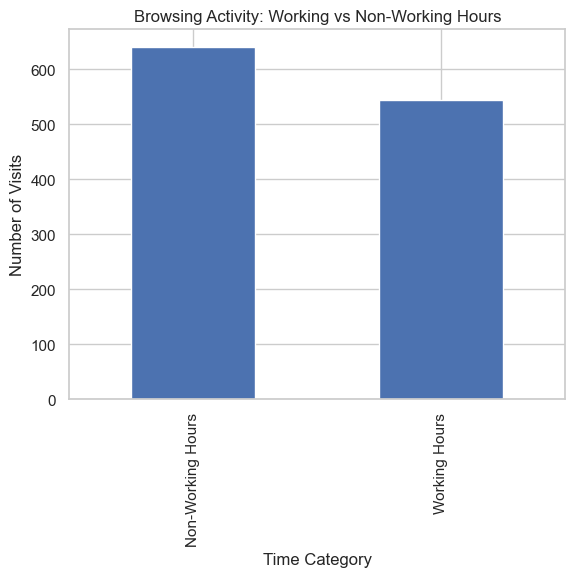

In [17]:
df["time_type"].value_counts().plot(kind="bar")
plt.title("Browsing Activity: Working vs Non-Working Hours")
plt.xlabel("Time Category")
plt.ylabel("Number of Visits")
plt.show()


ANALYSIS

the bar chart shows thats the browsing activiti is higher in the no working hours as comapred to the standerd working hour that 9am to 5pm this indicated that the user typical is active or usese the inthe internet more frequently outside the typical working hour 

Altought the browsing activity is substantial duing the working hour and higher during the non working houre this suggestes that the user engages in the browsing activity late in the evening or late night this patter may reflect in some prsonal browsing,entertainmet or assignment completion or academic work 

overall the result sugget that even though the browsing activity is more during the non working hours which accounts for majority of the browsing activity indicating a flexible routine whith significan after hour engagement 

Question 5 what are the users intrest based on the visited domains?

In [18]:
df["domain"].value_counts().head(15)


domain
www.google.com                  426
www.googleadservices.com         46
blackboard.umbc.edu              36
api-4f567d87.duosecurity.com     35
webauth.umbc.edu                 31
ad.doubleclick.net               28
www.cinemark.com                 26
www.nike.com                     26
teams.live.com                   23
www.ebay.com                     17
onionplay.bz                     16
supcase.com                      15
www.venum.com                    13
vpn-center.com                   12
top-toones.com                   12
Name: count, dtype: int64

In [19]:
# This is a function Function to map each domain to a high-level interest category
def categorize_domain(domain):
    domain = domain.lower()
    
    # Search engines
    if "google" in domain:
        return "Search"
    
    # Education-related websites
    elif "umbc" in domain or "blackboard" in domain or "edu" in domain:
        return "Education"
    
    # Entertainment platforms
    elif "youtube" in domain or "netflix" in domain:
        return "Entertainment"
    
    # Shopping websites
    elif "nike" in domain or "ebay" in domain or "amazon" in domain:
        return "Shopping"
    
    # Communication and collaboration tools
    elif "teams" in domain or "zoom" in domain:
        return "Communication"
    
    # Any domain that does not match the above categories
    else:
        return "Other"

# Applying  the categorization function to create a new column
df["interest"] = df["domain"].apply(categorize_domain)

# Displaying  the count of visits per interest category
df["interest"].value_counts()


interest
Other            545
Search           489
Education         82
Shopping          45
Communication     23
Name: count, dtype: int64

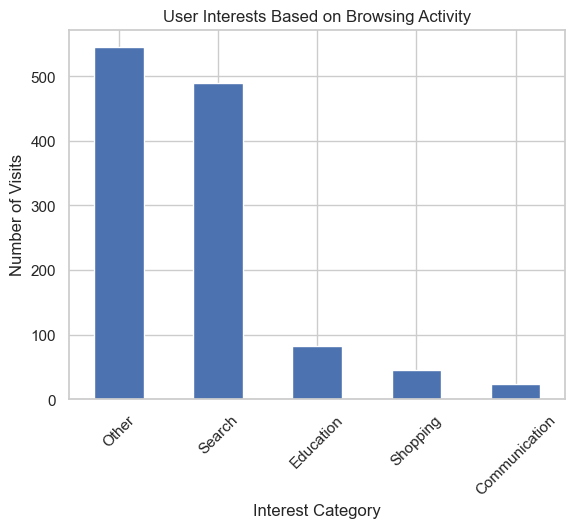

In [20]:
# Plot the distribution of interest categories
df["interest"].value_counts().plot(kind="bar")

# Adding plot labels and title
plt.title("User Interests Based on Browsing Activity")
plt.xlabel("Interest Category")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)


plt.show()


ANALYSIS

the bar chart shows that the others has the largest portion in the browsing catogorie and followed closly by sreach this indicates that the user visits diffrent types of website that dose o fall under a predefined catagories along with heavy use of the the serach engine for informatio discovery and navigation 

The education category smaller than the search it still accounts for a meaningful portion whit th efrequent visit to a university website which indicates regural engagement with academic platform and assignment.

Addationaly we also have shopping and commmunication in the in the intret catagory which are seeked less frequently which indicates occasional personal browsing and online interaction. 

Overall the result suggest that the user is primarily dirven by information seeking and diverise online acitivity followy by educational activity 

Ouestion 6 How consistent is the browsing activit of the user and how dose it vary over time ?

In [23]:
# Counting the  number of visits per calendar date
daily_counts = df["date"].value_counts().sort_index()
daily_counts.head()


date
2024-09-26     1
2025-11-27    10
2025-11-28    46
2025-11-29    34
2025-11-30    46
Name: count, dtype: int64

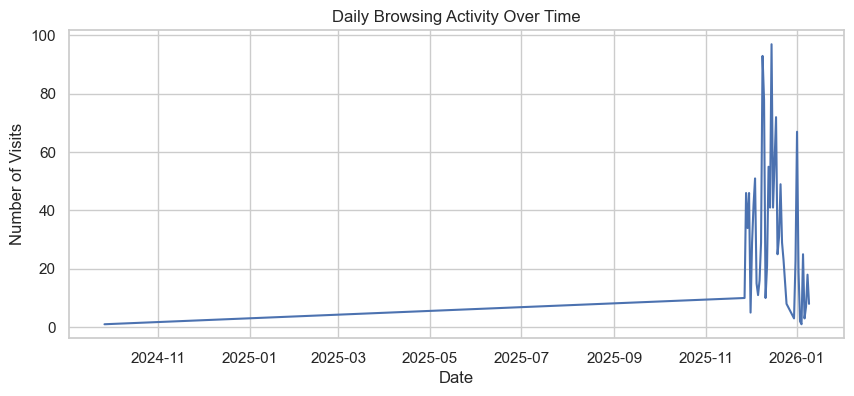

In [24]:
# Ploting browsing activity over time
daily_counts.plot(kind="line", figsize=(10, 4))
plt.title("Daily Browsing Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.show()


ANALYSIS

The time series plot indicates that users browsing activity is uneven over time with very little activity on earlier dates and an  increase in later periods. This pattern suggests that browsing history captures phases of minimal use and periods of more active engagement, rather than steady levels of daily browsing.

Several spikes in the plot indicate higher Internet usage on specific days which can be possibly driven by academic deadlines, research assignments, or extended personal browsing sessions. Overall, browsing behavior appears to be inconsistent over time, reflecting that the  patterns is influenced by changing daily demands .

QUESTION 7 Domains accesed during late night hours ?

In [25]:
# Defineing late-night browsing hours 10pm to 5am
df["late_night"] = df["hour"].apply(
    lambda x: "Late Night" if (x >= 22 or x <= 5) else "Daytime"
)

df["late_night"].value_counts()


late_night
Daytime       868
Late Night    316
Name: count, dtype: int64

In [26]:
# identifying  only late-night browsing activity
late_night_domains = df[df["late_night"] == "Late Night"]["domain"].value_counts().head(10)
late_night_domains


domain
www.google.com                  155
webauth.umbc.edu                 17
blackboard.umbc.edu              17
api-4f567d87.duosecurity.com     16
top-toones.com                   12
vpn-center.com                    9
www.levi.com                      9
mz2v.com                          6
onionplay.bz                      5
wu.ramekinicotype.shop            4
Name: count, dtype: int64

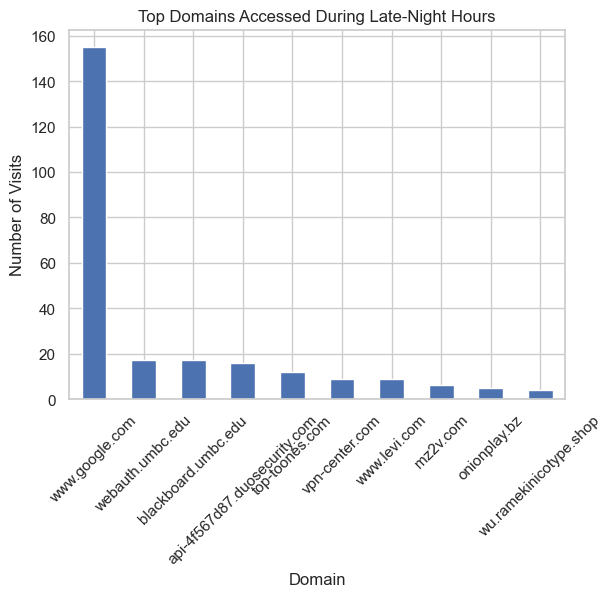

In [27]:
late_night_domains.plot(kind="bar")
plt.title("Top Domains Accessed During Late-Night Hours")
plt.xlabel("Domain")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.show()


ANALYSIS

As the bar graph suggests that the www.google.com is the more visited domain in the night hours which indicates that the users late night browsing is largly driven by informative serches and general web navigation rather than spending time in a specidic domain.


Several educational domains have also been visited in the late night hours like blackboard.edu and umbc.edu which indicate that user is accesing course work at non working hours possibly dude to late night study or assignment completion 

In addition we also have a les frequently visited domians indication some intrest in personal browing. Overall the  results indicate that night browsing is centered around search activity and small but noticiable amoutnt of time spend for academic purpose.

QUESTION 8 dose the user rely on direct website visit or search driven browsing ?

In [29]:

# If the domain contains "google" it is classified as Search Engine usage
# Otherwiseit is ed  treat  as a Directwebsite visit
df["is_search"] = df["domain"].apply(
    lambda x: "Search Engine" if "google" in x.lower() else "Direct / Other"
)

df["is_search"].value_counts()



is_search
Direct / Other    695
Search Engine     489
Name: count, dtype: int64

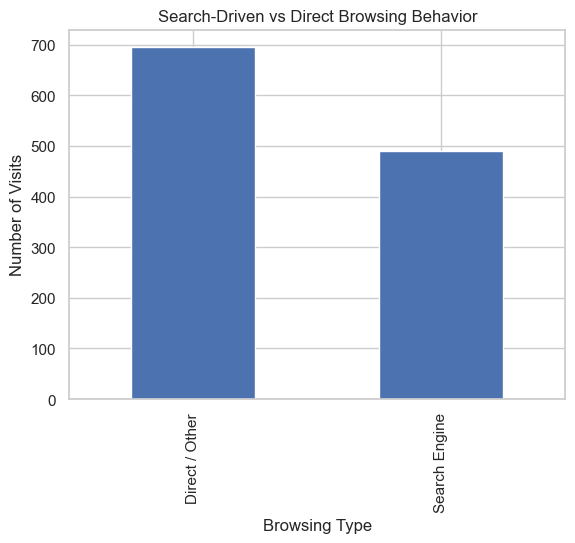

In [30]:
# Ploting  the distribution of search-driven versus direct browsing activity
df["is_search"].value_counts().plot(kind="bar")

plt.title("Search-Driven vs Direct Browsing Behavior")
plt.xlabel("Browsing Type")
plt.ylabel("Number of Visits")
plt.show()


ANALYSIS 

The bar chart showes that direct search slight exceed the serach engine driven activity as we can see that the browising activity for drirect is higher it indicates that the user access known website without relying on search engine that much this also suggests frequent engaement with academic website 

overall the resluts show a balanced browsing pattern where search engines are used for primary information discovery while the direct visit dominates the goal orianted task.this behaviour is also seen in experienced user who switch between elpolaratpry search and direct acces to frequently visited domain.


QUESTION 9 How do weekday and week end browsing pattern reflect the users daily habbit?

In [32]:
# Createing a new column that classifyes days as Weekday or Weekend
df["day_type"] = df["day"].apply(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

# Counting browsing activity for each day type
df["day_type"].value_counts()


day_type
Weekday    898
Weekend    286
Name: count, dtype: int64

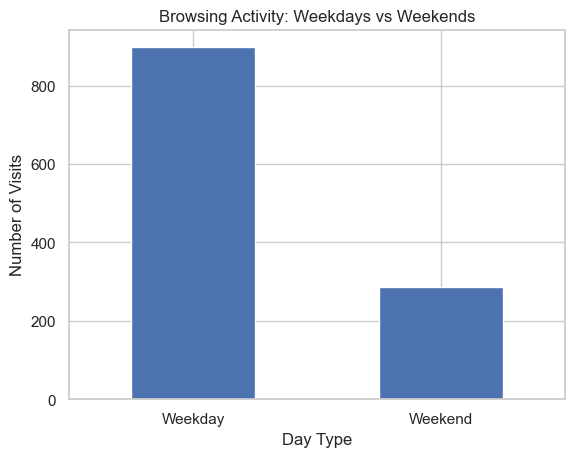

In [33]:
# Ploting  browsing activity for weekdays vs weekends
df["day_type"].value_counts().plot(kind="bar")

plt.title("Browsing Activity: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Number of Visits")
plt.xticks(rotation=0)
plt.show()


ANALYSIS 

The bar chart shows a clear difference bewtween weekday and weekend browsing behaviour. browsing activity during the weekday is more than than the browsing activity in the weekend.this indicates that the users internet browisng is lardly spent or driven by structured obligation such as assignmet completion or academics 

In contract the browsing activity for the weekend has dropped noticable this suggests that the user decreases the online engagment during the weekends possibly opting for more offline activity or more selective browsing.overall the disparty between the weekday and the weekend browsing activity it indicates that the user leads a very disciplined life and a rotuine oriented lifestyle  

QUESTION 10 based on the browsing data dose it suggest that the device is primerly used for personl oe work related activity?

In [40]:
# Functions to classify browsing activity as Work or academic 
def classify_computer_usage(domain):
    domain = domain.lower()
    
    
    if "umbc" in domain or "blackboard" in domain or "edu" in domain or "webauth" in domain:
        return "Work / Academic"
    else:
        return "Personal"

# Applying the classification to create a new column
df["computer_usage"] = df["domain"].apply(classify_computer_usage)


df["computer_usage"].value_counts()


computer_usage
Personal           1102
Work / Academic      82
Name: count, dtype: int64

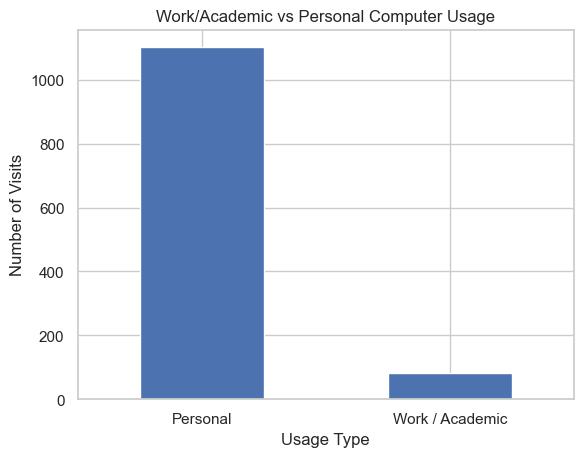

In [38]:
# Plot the distribution of work/academic vs personal usage
df["computer_usage"].value_counts().plot(kind="bar")

# Add plot labels and title
plt.title("Work/Academic vs Personal Computer Usage")
plt.xlabel("Usage Type")
plt.ylabel("Number of Visits")
plt.xticks(rotation=0)

# Display the plot
plt.show()


ANALYSIS 

as the bar graph shows that majority of browsing activity falls under personal use  with significantly fewewr vites to work related tasks.this suggests that the computer is primaly used for personal use suach are entertainment or casusal browsing although some work related activity is present its in the much smaller portion of over all usage indicateing that education tasts are secondary on this device 